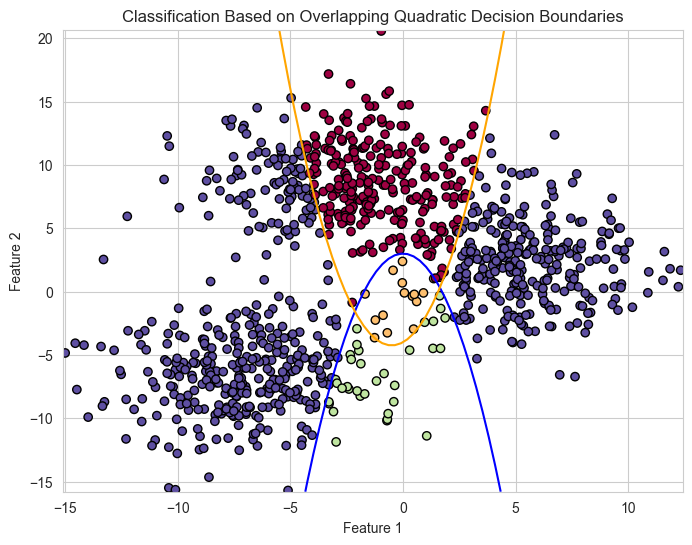

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs

# Generate synthetic dataset
n_samples = 300
n_features = 2
n_classes = 3

X, _ = make_blobs(n_samples=1000, centers=n_classes, n_features=n_features, cluster_std=3, random_state=42)


def custom_boundary_1(x, y):
    return (x) ** 2 + y - 3


def custom_boundary_2(x, y):
    return -((x) ** 2) + y - x + 4

def rotate(x, y, theta):
    return [x*np.cos(theta) - y*np.sin(theta), x*np.sin(theta) + y*np.cos(theta)]

# Create a meshgrid for visualization
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Evaluate decision boundaries on the meshgrid
xx_rotated, yy_rotated = rotate(xx, yy, 0)
boundary_1 = custom_boundary_1(xx_rotated, yy_rotated)
boundary_2 = custom_boundary_2(xx_rotated, yy_rotated)

# Classify points based on overlapping custom quadratic decision boundaries
classified_labels = []
for point in X:
    rotated_point = rotate(point[0], point[1], 0)
    region_1 = custom_boundary_1(rotated_point[0], rotated_point[1]) >= 0 
    region_2 = custom_boundary_2(rotated_point[0], rotated_point[1]) >= 0
    
    if region_1 and region_2:
        classified_labels.append(1)
    elif not region_1 and region_2:
        classified_labels.append(2)
    elif not region_1 and not region_2:
        classified_labels.append(3)
    else:
        classified_labels.append(4)

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=classified_labels, cmap=plt.cm.Spectral, marker='o', edgecolors='k')
plt.contour(xx, yy, boundary_1, levels=[0], colors='blue')
plt.contour(xx, yy, boundary_2, levels=[0], colors='orange')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Classification Based on Overlapping Quadratic Decision Boundaries')
plt.show()

In [1]:
def custom_boundary_1(x, y):
    return (x) ** 2 + y - 3

def custom_boundary_2(x, y):
    return -((x) ** 2) + y - x + 4

def rotate(x, y, theta):
    return [x*np.cos(theta) - y*np.sin(theta), x*np.sin(theta) + y*np.cos(theta)]

In [2]:
from sklearn.metrics import euclidean_distances


def generate_mean_values(min_distance, n_features, n_classes):
    mean_values = []
    while len(mean_values) < n_classes:
        means = np.random.uniform(-3, 3, n_features)
        too_close = False
        for existing_mean in mean_values:
            distance = euclidean_distances([means], [existing_mean])[0][0]
            if distance < min_distance:
                too_close = True
                break
        if not too_close:
            mean_values.append(means)
    return mean_values

In [6]:
centers = generate_mean_values(
                min_distance=3,
                n_features=2,
                n_classes=4,
            )

In [7]:
n_concepts = 5
concept_size = 1000
last_concept_size = 20

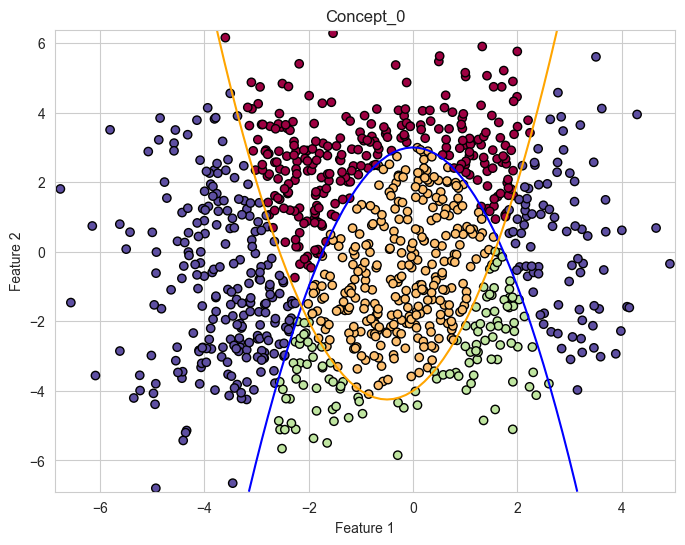

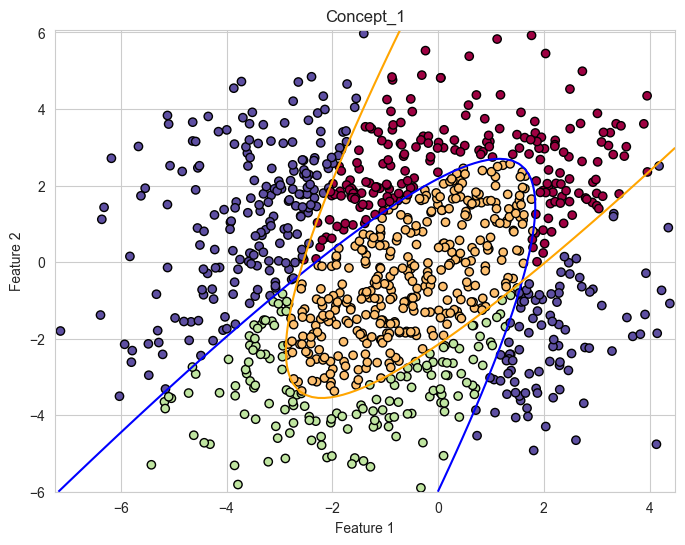

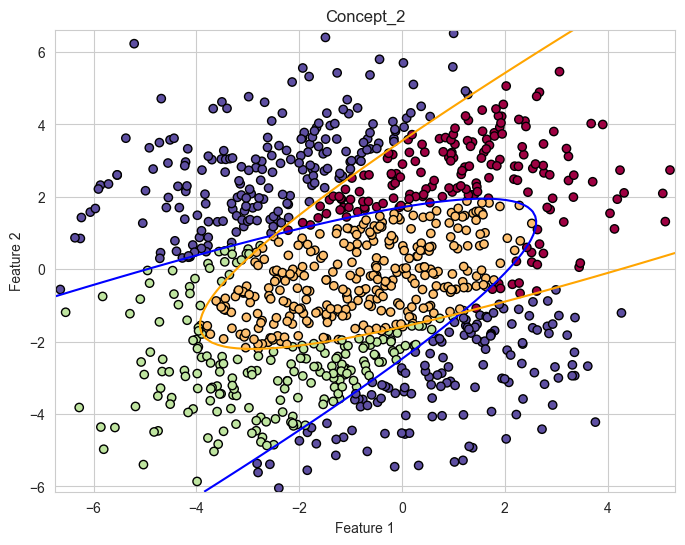

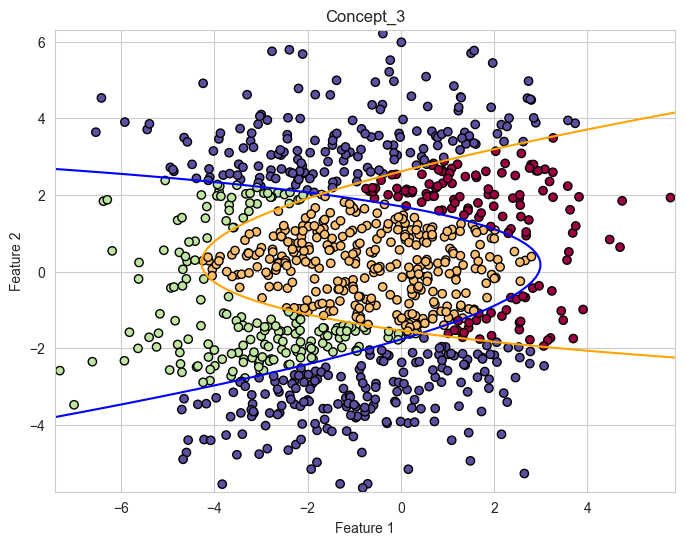

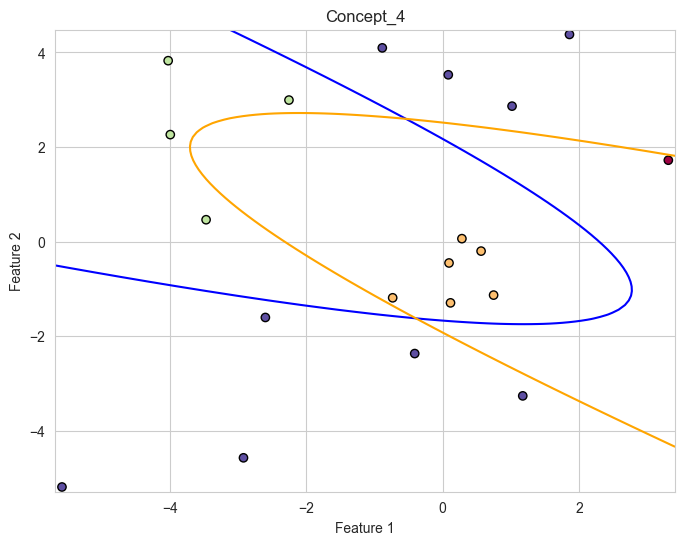

In [10]:

for i in range(n_concepts):

    if i != n_concepts - 1:
        X, _ = make_blobs(
            n_samples=concept_size,
            centers=centers,
            n_features=2,
            cluster_std=1.5,
        )
    else:
        X, _ = make_blobs(
            n_samples=last_concept_size,
            centers=centers,
            n_features=2,
            cluster_std=1.5,
        )
        
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    # Evaluate decision boundaries on the meshgrid
    xx_rotated, yy_rotated = rotate(xx, yy, 0.5*i)
    boundary_1 = custom_boundary_1(xx_rotated, yy_rotated)
    boundary_2 = custom_boundary_2(xx_rotated, yy_rotated)

    classified_labels = []
    for point in X:
        rotated_point = rotate(point[0], point[1], 0.5*i)
        region_1 = custom_boundary_1(rotated_point[0], rotated_point[1]) >= 0
        region_2 = custom_boundary_2(rotated_point[0], rotated_point[1]) >= 0

        if region_1 and region_2:
            classified_labels.append(1)
        elif not region_1 and region_2:
            classified_labels.append(2)
        elif not region_1 and not region_2:
            classified_labels.append(3)
        else:
            classified_labels.append(4)
    
    # merge X with classified_labels in a Pandas DataFrame
    df = pd.DataFrame(X, columns=['X_0', 'X_1'])
    df['y_0'] = classified_labels
    
    
    plt.figure(figsize=(8, 6))
    plt.scatter(df['X_0'], df['X_1'], c=df['y_0'], cmap=plt.cm.Spectral, marker='o', edgecolors='k')
    plt.contour(xx, yy, boundary_1, levels=[0], colors='blue')
    plt.contour(xx, yy, boundary_2, levels=[0], colors='orange')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Concept_{i}')
    plt.show()

In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def generate_data(data_size = 10000, # before imbalance, approx
                x_min_max = 2,
                shape_param_1 = 1, # try values like 3,5,7,[10] and see how graph changes
                shape_param_2 = 0.5, # try 5,10,15,20
                shape_param_3 = 2, # try between 1-5
                shape_param_4 = 3, # try 50,100,150,200
                add_shapes_for_extra_complexity = True,
                plot=False):
    
    min_x,max_x = -x_min_max,x_min_max
    interval = (max_x-min_x)/data_size
    x_0 = np.arange(min_x,max_x,interval)
    y_line = np.clip((x_0**3)/shape_param_4 - shape_param_1*x_0 + shape_param_2*np.sin(x_0/shape_param_3),-80,80)
    
    x_1 = np.random.uniform(min(y_line)-2,max(y_line)+2,len(x_0))
    y = x_1>y_line
    if add_shapes_for_extra_complexity:
        circle1 = np.where((x_0-0.5)**2 + (x_1-0.5)**2 < 1)
        y[circle1] = ~(np.mean(y[circle1])>0.5)
        
        circle2 = np.where((x_0+0.7)**2 + (x_1+1)**2 < 1)
        y[circle2] = ~(np.mean(y[circle2])>0.5)
        circle3 = np.where((x_0-1)**2 + (x_1+1)**2 < 1)
        y[circle3] = ~(np.mean(y[circle3])>0.5)
        
        circle4 = np.where((x_0+0.2)**2 + (x_1-0.2)**2 < 0.5)
        y[circle4] = ~(np.mean(y[circle4])>0.5)
        
    X = pd.DataFrame({"x_0": x_0, "x_1": x_1, "y_0": y})
    
    if plot:
    
        plt.figure(figsize=(14,5))
        sns.scatterplot(x=x_0,y=x_1,hue=y)
        plt.title("Data: Ratio +/- = %.3f"%(np.sum(y)/np.sum(~y)))
        plt.show()

    return X

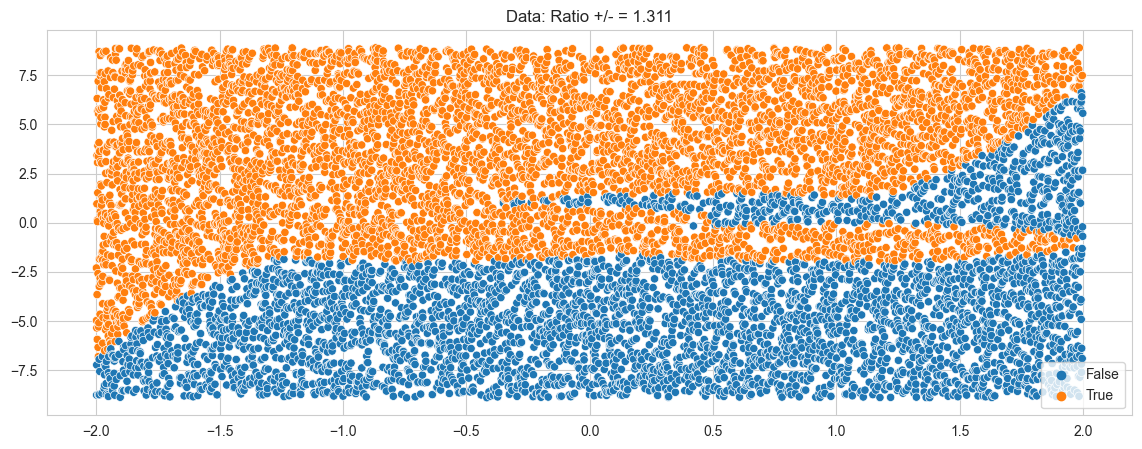

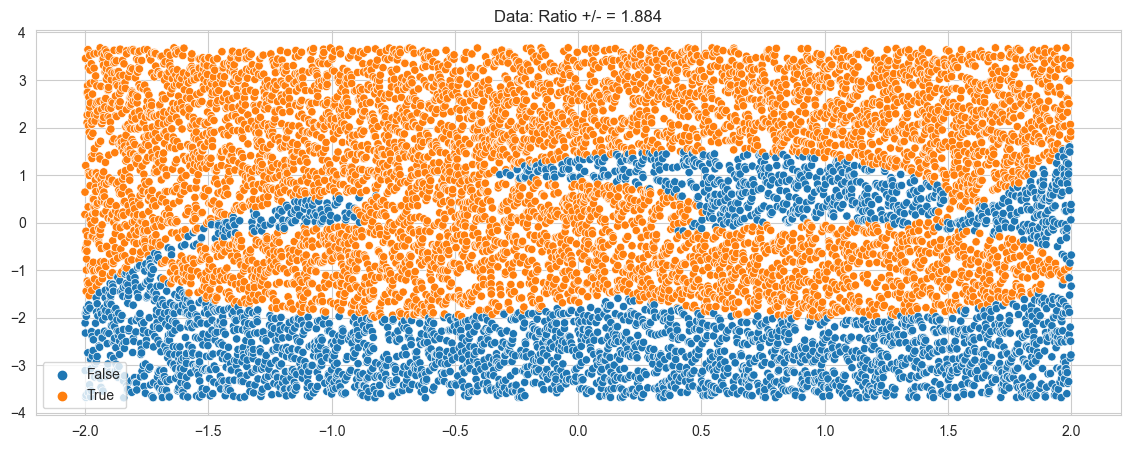

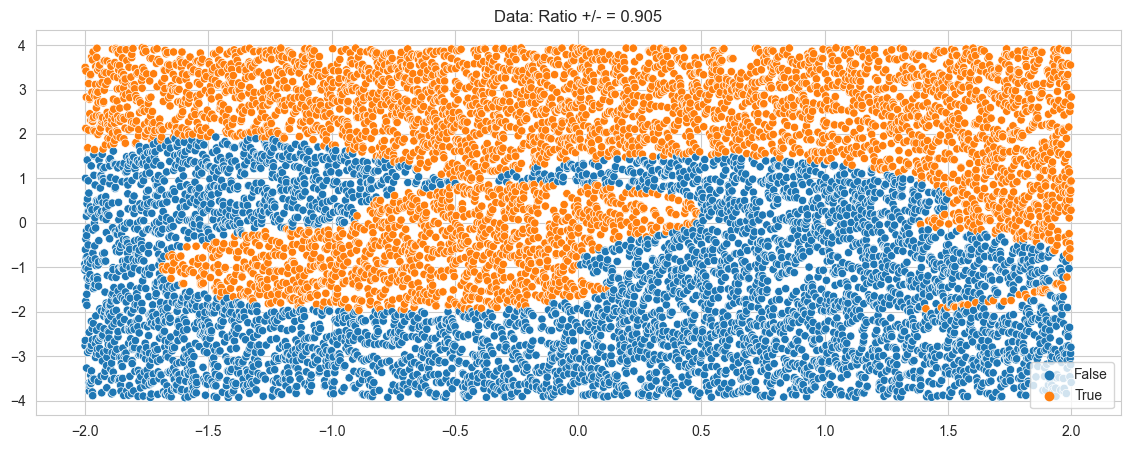

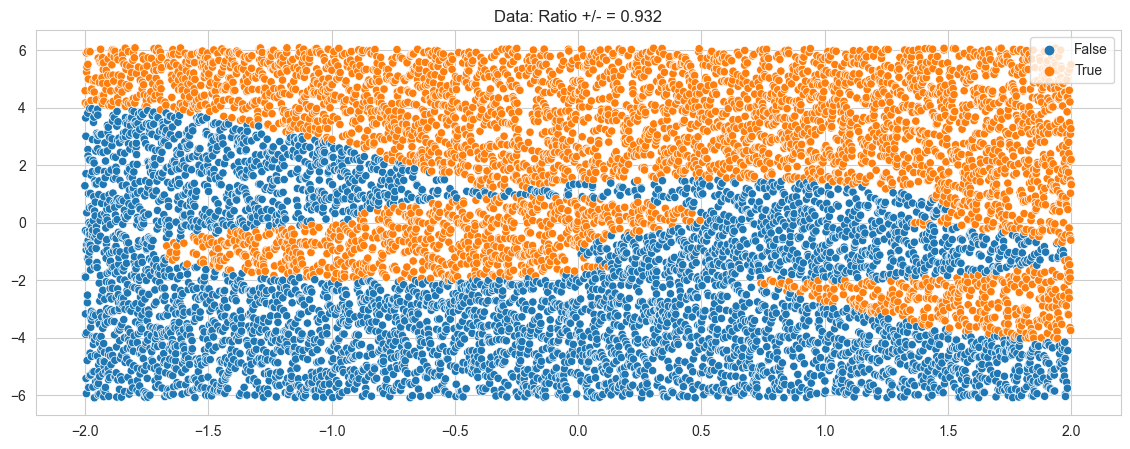

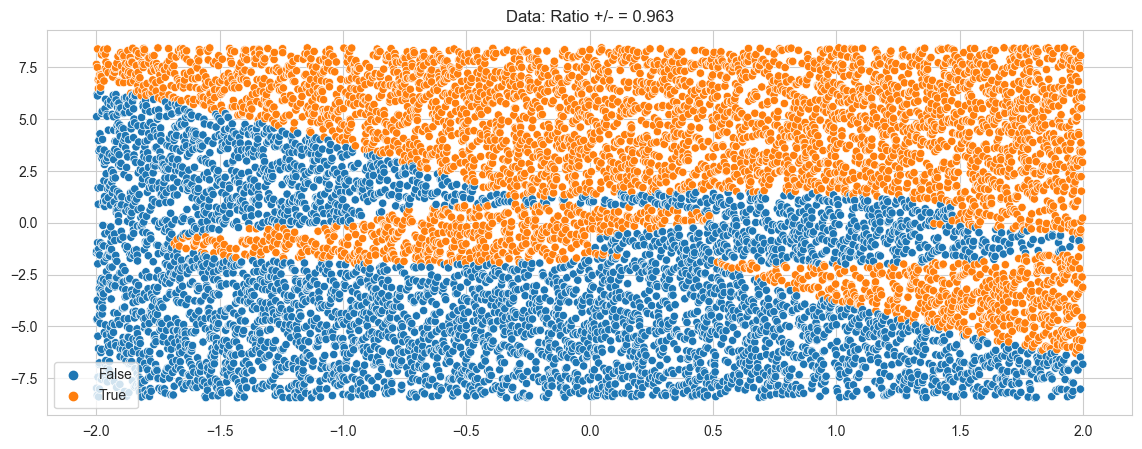

In [8]:
for i in range(5):
    shape_param_1 = i + 1
    shape_param_2 = i + 1
    shape_param_3 = i + 1
    shape_param_4 = i + 1

    generate_data(data_size=10000, x_min_max=2, shape_param_1=shape_param_1, shape_param_2=shape_param_2, shape_param_3=shape_param_3, shape_param_4=shape_param_4, plot=True)

In [9]:
def label_sample(x):
    x_0 = x[0]
    x_1 = x[1]

    y_line = np.clip((x_0**3)/shape_param_4 - shape_param_1*x_0 + shape_param_2*np.sin(x_0/shape_param_3),-80,80)
    y = [x_1>y_line]
    circle1 = np.where((x_0-0.5)**2 + (x_1-0.5)**2 < 1)[0]
    if circle1.shape[0] != 0:
        circle1 = circle1[0]
        y[circle1] = ~(np.mean(y[circle1])>0.5)
    
    circle2 = np.where((x_0+0.7)**2 + (x_1+1)**2 < 1)[0]
    if circle2.shape[0] != 0:
        circle2 = circle2[0]
        y[circle2] = ~(np.mean(y[circle2])>0.5)
    circle3 = np.where((x_0-1)**2 + (x_1+1)**2 < 1)[0]
    if circle3.shape[0] != 0:
        circle3 = circle3[0]
        y[circle3] = ~(np.mean(y[circle3])>0.5)
    
    circle4 = np.where((x_0+0.2)**2 + (x_1-0.2)**2 < 0.5)[0]
    if circle4.shape[0] != 0:
        circle4 = circle4[0]
        y[circle4] = ~(np.mean(y[circle4])>0.5)

    return y

In [31]:
sample = [1, 2.5]


In [32]:
label_sample(sample)

[True]

In [33]:
X = generate_data(
    data_size=10000,
    x_min_max=2,
    shape_param_1=1,
    shape_param_2=1,
    shape_param_3=1,
    shape_param_4=1,
    plot=False,
)

In [34]:
X

x_0       x_1    y_0
0    -2.0000 -4.273047   True
1    -1.9996 -6.225763   True
2    -1.9992  4.003798   True
3    -1.9988  5.135917   True
4    -1.9984 -8.200717  False
...      ...       ...    ...
9995  1.9980 -2.304422  False
9996  1.9984  6.226291  False
9997  1.9988 -3.661895  False
9998  1.9992  0.202359  False
9999  1.9996  5.016088  False

[10000 rows x 3 columns]